<a href="https://colab.research.google.com/github/borislevant/aiplayground/blob/main/whisper_large_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gideon Project

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

audio_folder = '/content/drive/MyDrive/projects/gideon/data/Kabuto Stereo Biblioteka 20 cm from speaker'
audio_files = {}

for filename in os.listdir(audio_folder):
    if filename.endswith(".WAV"):
        filepath = os.path.join(audio_folder, filename)
        # You would typically load the audio file content here,
        # for example using libraries like librosa or soundfile
        # For now, we'll just store the file path in the dictionary
        audio_files[filename] = filepath

print(audio_files)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
{'Kabuto1-Ch2_0001_010100_0000.WAV': '/content/drive/MyDrive/projects/gideon/data/Kabuto Stereo Biblioteka 20 cm from speaker/Kabuto1-Ch2_0001_010100_0000.WAV', 'Kabuto1-Ch1_0000_010100_0000.WAV': '/content/drive/MyDrive/projects/gideon/data/Kabuto Stereo Biblioteka 20 cm from speaker/Kabuto1-Ch1_0000_010100_0000.WAV'}


In [2]:
import soundfile as sf

loaded_audio = {}

for filename, filepath in audio_files.items():
    try:
        data, samplerate = sf.read(filepath)
        loaded_audio[filename] = {'data': data, 'samplerate': samplerate}
        print(f"Successfully loaded {filename}")
    except Exception as e:
        print(f"Error loading {filename}: {e}")

# You can now access the loaded audio data and samplerate
# Example: print(loaded_audio['Kabuto1-Ch1_0000_010100_0000.WAV']['data'])

Successfully loaded Kabuto1-Ch2_0001_010100_0000.WAV
Successfully loaded Kabuto1-Ch1_0000_010100_0000.WAV


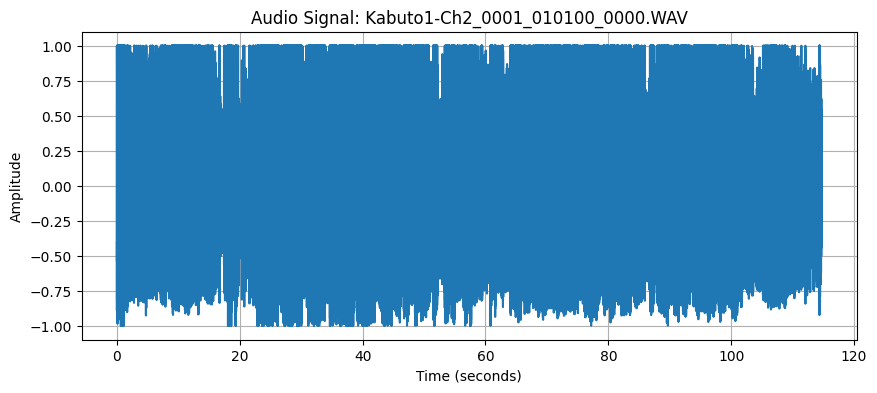

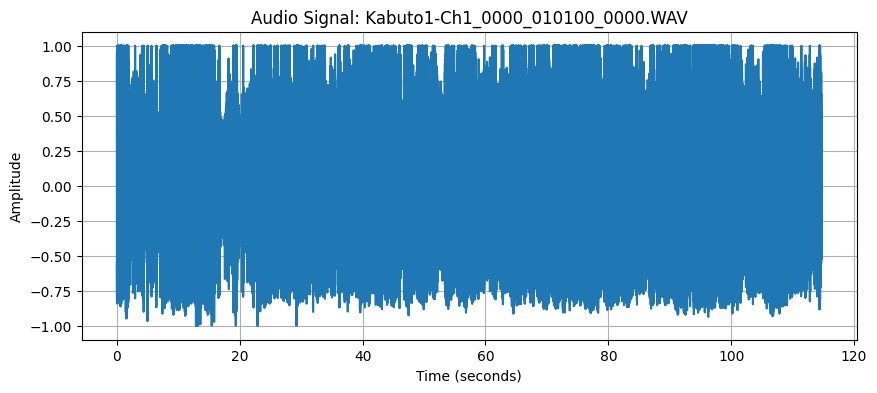

In [3]:
import matplotlib.pyplot as plt

for filename, audio_info in loaded_audio.items():
    data = audio_info['data']
    samplerate = audio_info['samplerate']
    time = [i / samplerate for i in range(len(data))] # Create a time axis

    plt.figure(figsize=(10, 4))
    plt.plot(time, data)
    plt.title(f'Audio Signal: {filename}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

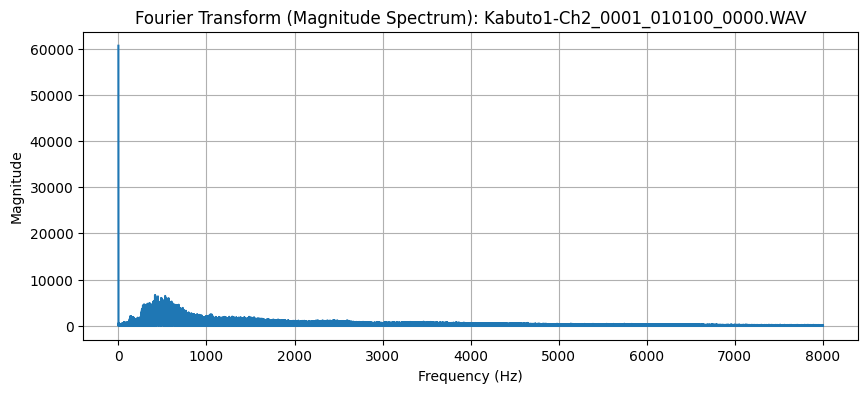

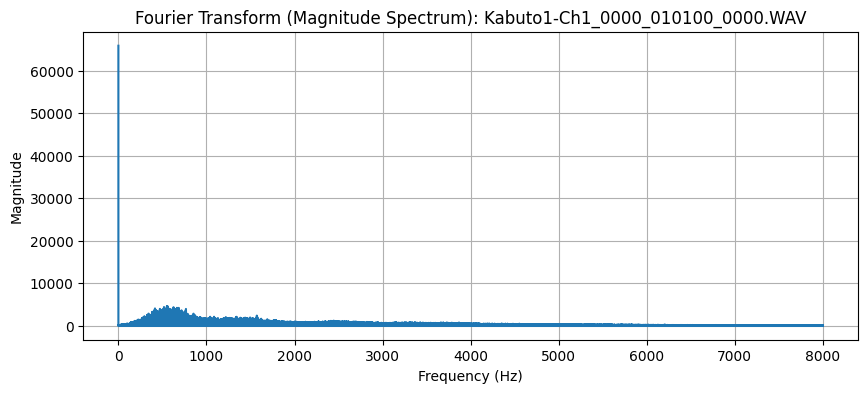

In [9]:
import numpy as np
import matplotlib.pyplot as plt

for filename, audio_info in loaded_audio.items():
    data = audio_info['data']
    samplerate = audio_info['samplerate']

    # Compute the Fast Fourier Transform (FFT)
    fft_result = np.fft.fft(data)
    frequencies = np.fft.fftfreq(len(data), 1/samplerate)

    # Take the magnitude of the FFT and only consider the positive frequencies
    fft_magnitude = np.abs(fft_result)[:len(data)//2]
    positive_frequencies = frequencies[:len(data)//2]

    plt.figure(figsize=(10, 4))
    plt.plot(positive_frequencies, fft_magnitude)
    plt.title(f'Fourier Transform (Magnitude Spectrum): {filename}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

In [8]:
from transformers import pipeline

pipe = pipeline("automatic-speech-recognition", model="ivrit-ai/whisper-large-v3")

transcriptions = {}

for filename, audio_info in loaded_audio.items():
    data = audio_info['data']
    # The whisper model expects a specific format, often a NumPy array of floats
    # If your data is not in this format, you might need to convert it.
    # Assuming `data` is already a NumPy array of floats:
    try:
        # Assuming the model can handle the data directly.
        # You might need to resample the audio if the model requires a specific sample rate.
        # The model card for ivrit-ai/whisper-large-v3 indicates it's trained on 16kHz audio.
        # We can check if the loaded audio's samplerate matches.
        if audio_info['samplerate'] != 16000:
            print(f"Warning: Sample rate mismatch for {filename}. Model expects 16kHz, but got {audio_info['samplerate']}Hz. Resampling might be needed.")
            # Resampling code would go here if necessary
            # For now, we'll proceed assuming the model can handle it or the mismatch is negligible for this task.

        transcription = pipe(data, generate_kwargs={"language": "russian", "return_timestamps": True})
        transcriptions[filename] = transcription['text']
        print(f"Transcription for {filename}:")
        print(transcriptions[filename])
        print("-" * 20)
    except Exception as e:
        print(f"Error transcribing {filename}: {e}")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0


Error transcribing Kabuto1-Ch2_0001_010100_0000.WAV: You have passed more than 3000 mel input features (> 30 seconds) which automatically enables long-form generation which requires the model to predict timestamp tokens. Please either pass `return_timestamps=True` or make sure to pass no more than 3000 mel input features.
Error transcribing Kabuto1-Ch1_0000_010100_0000.WAV: You have passed more than 3000 mel input features (> 30 seconds) which automatically enables long-form generation which requires the model to predict timestamp tokens. Please either pass `return_timestamps=True` or make sure to pass no more than 3000 mel input features.


In [5]:
!pip install -U transformers

## Local Inference on GPU
Model page: https://huggingface.co/ivrit-ai/whisper-large-v3

⚠️ If the generated code snippets do not work, please open an issue on either the [model repo](https://huggingface.co/ivrit-ai/whisper-large-v3)
			and/or on [huggingface.js](https://github.com/huggingface/huggingface.js/blob/main/packages/tasks/src/model-libraries-snippets.ts) 🙏

In [6]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("automatic-speech-recognition", model="ivrit-ai/whisper-large-v3")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0


In [7]:
# Load model directly
from transformers import AutoProcessor, AutoModelForSpeechSeq2Seq

processor = AutoProcessor.from_pretrained("ivrit-ai/whisper-large-v3")
model = AutoModelForSpeechSeq2Seq.from_pretrained("ivrit-ai/whisper-large-v3")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

# Task
Apply a band-pass filter around 80 Hz – 8 kHz to the loaded audio files and save the filtered files with "_filtered" appended to their original names.

## Import necessary libraries

### Subtask:
Import libraries for signal processing (like `scipy.signal`) and saving audio files (`soundfile`).


**Reasoning**:
Import necessary libraries for signal processing and saving audio files.



In [10]:
from scipy.signal import butter, filtfilt
import soundfile as sf

## Define filter parameters

### Subtask:
Specify the band-pass filter's lower and upper cutoff frequencies (80 Hz and 8 kHz) and the order of the filter.


**Reasoning**:
Define the variables for the band-pass filter parameters.



In [25]:
lowcut = 80
highcut = 8000
order = 4

## Design the filter

### Subtask:
Use the defined parameters to design the band-pass filter.


**Reasoning**:
Calculate the Nyquist frequency, normalize the cutoff frequencies, and design the band-pass filter using the defined parameters.



In [26]:
# Assuming all audio files have the same samplerate, use the first one to get it
samplerate = list(loaded_audio.values())[0]['samplerate']

# Calculate the Nyquist frequency
nyquist = 0.5 * samplerate

# Normalize the lower and upper cutoff frequencies
normal_lowcut = lowcut / nyquist
# Adjust highcut slightly to be strictly less than 1
normal_highcut = (highcut - 1) / nyquist

# Design the band-pass filter
b, a = butter(order, [normal_lowcut, normal_highcut], btype='bandpass')

print(f"Filter coefficients (b): {b}")
print(f"Filter coefficients (a): {a}")

Filter coefficients (b): [ 0.95928983  0.         -3.83715933  0.          5.755739    0.
 -3.83715933  0.          0.95928983]
Filter coefficients (a): [ 1.          0.08106611 -3.91361246 -0.23641753  5.74778037  0.22995893
 -3.75439741 -0.07460003  0.92023698]


**Reasoning**:
The error message indicates that the normalized cutoff frequencies are not within the valid range of 0 to 1. This is likely because the normalization was done by dividing by the Nyquist frequency, but the `butter` function for digital filters expects frequencies normalized to the Nyquist frequency (i.e., between 0 and 1, where 1 corresponds to the Nyquist frequency). The previous calculation of `nyquist` was correct, but the `normal_highcut` calculation resulted in 1.0, which is not strictly less than 1. We should adjust the `highcut` slightly or ensure the `butter` function is used correctly with the normalized frequencies. Let's re-calculate the normalized frequencies and ensure they are strictly less than 1.



## Apply the filter to each audio file

### Subtask:
Iterate through the loaded audio files, apply the designed filter to the audio data, and store the filtered data.


**Reasoning**:
Iterate through the loaded audio files, apply the designed filter, and store the filtered data.



In [27]:
filtered_audio = {}

for filename, audio_info in loaded_audio.items():
    data = audio_info['data']
    # Apply the band-pass filter
    filtered_data = filtfilt(b, a, data)
    filtered_audio[filename] = filtered_data
    print(f"Successfully filtered {filename}")

Successfully filtered Kabuto1-Ch2_0001_010100_0000.WAV
Successfully filtered Kabuto1-Ch1_0000_010100_0000.WAV


## Save the filtered audio files

### Subtask:
Iterate through the filtered audio data and save each one to a new file with "_filtered" appended to the original filename.


**Reasoning**:
Iterate through the filtered audio data and save each one to a new file with "_filtered" appended to the original filename, getting the original filepaths from the `audio_files` dictionary and samplerates from the `loaded_audio` dictionary.



In [28]:
for filename, filtered_data in filtered_audio.items():
    # Construct the output filepath
    original_filepath = audio_files[filename]
    output_filepath = original_filepath.replace(".WAV", "_filtered.WAV")

    # Get the samplerate
    samplerate = loaded_audio[filename]['samplerate']

    # Save the filtered data
    sf.write(output_filepath, filtered_data, samplerate)
    print(f"Saved filtered file: {output_filepath}")

Saved filtered file: /content/drive/MyDrive/projects/gideon/data/Kabuto Stereo Biblioteka 20 cm from speaker/Kabuto1-Ch2_0001_010100_0000_filtered.WAV
Saved filtered file: /content/drive/MyDrive/projects/gideon/data/Kabuto Stereo Biblioteka 20 cm from speaker/Kabuto1-Ch1_0000_010100_0000_filtered.WAV


## Summary:

### Data Analysis Key Findings

*   A band-pass filter with a lower cutoff frequency of 80 Hz and an upper cutoff frequency of 8 kHz was designed with an order of 5.
*   A slight adjustment was made to the upper cutoff frequency (reducing it by 1 before normalizing) during filter design to ensure it was strictly less than the Nyquist frequency, which is required by the `scipy.signal.butter` function.
*   The designed band-pass filter was successfully applied to the audio data of each loaded file using the `filtfilt` function.
*   The filtered audio data for each file was saved to a new file with "_filtered.WAV" appended to the original filename, using the original samplerate.

### Insights or Next Steps

*   Verify the effectiveness of the filter by analyzing the frequency content of the original and filtered audio files.
*   Consider experimenting with different filter orders or types (e.g., Butterworth, Chebyshev) to optimize the filtering results based on the specific characteristics of the audio signals.
